In [1]:
import keras
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline


Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

In [24]:
# import data
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

#shape and type of the data
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [25]:
# range of the data
X_train_full.min(), X_train_full.max()

(0, 255)

In [26]:
# rescale to be in the interval [0,1], this should learn better, since 
# initialization happens with standard normal, or similarly small values.

X_train_full = X_train_full/255
X_test = X_test/255

In [27]:
# make a validation split beyond the basic test/train
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full,
                                                  test_size=0.2, 
                                                  random_state=42)

In [28]:
# build the model

model = keras.models.Sequential()  # simplest model: a stack of layers
model.add(keras.layers.Flatten(input_shape=[28, 28])) # just flatten
model.add(keras.layers.Dense(300, activation="relu")) # Dense layer 
                                   # with 300 neurons (300 outputs)
model.add(keras.layers.Dense(100, activation="relu")) # Dense layer 
                                   # with 100 neurons.
model.add(keras.layers.Dense(10, activation="softmax")) # Dense layer
                                   # with 10 outputs, using
                                   # softmax because this is 
                                   # a multiclass classification

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_8 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Learning rate with decay
##    lr *= (1. / (1. + decay * iterations))

learning_rate=0.01
decay = 1e-6



In [32]:
# Compile the model 
learning_rate=0.01
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr = learning_rate,
                                             decay = decay,
                                             momentum = 0.8, 
                                             nesterov=False),
               metrics=["accuracy"])

## use sparse because categorical labels => sparse one-hot encoding


In [34]:
# Train the model
history = model.fit(X_train, y_train, 
                    epochs=10,
                    validation_data=(X_val, y_val))

# batch_size defaults to 32


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 6s 122us/step - loss: 0.4061 - acc: 0.8525 - val_loss: 0.3780 - val_acc: 0.8648
Epoch 2/10
48000/48000 [==============================] - 5s 107us/step - loss: 0.3635 - acc: 0.8679 - val_loss: 0.3550 - val_acc: 0.8732
Epoch 3/10
48000/48000 [==============================] - 7s 152us/step - loss: 0.3362 - acc: 0.8761 - val_loss: 0.3651 - val_acc: 0.8694
Epoch 4/10
48000/48000 [==============================] - 6s 123us/step - loss: 0.3190 - acc: 0.8811 - val_loss: 0.3469 - val_acc: 0.8744
Epoch 5/10
48000/48000 [==============================] - 6s 125us/step - loss: 0.3001 - acc: 0.8891 - val_loss: 0.3300 - val_acc: 0.8783
Epoch 6/10
48000/48000 [==============================] - 6s 123us/step - loss: 0.2859 - acc: 0.8933 - val_loss: 0.3237 - val_acc: 0.8828
Epoch 7/10
48000/48000 [==============================] - 6s 129us/step - loss: 0.2735 - acc: 0.8987 - val_loss: 0.3539 - 

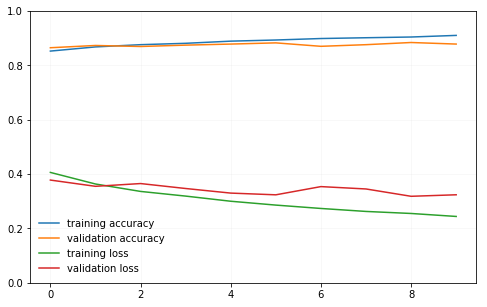

In [35]:
# Plot the history
plt.figure(figsize=(8,5))
plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label='validation accuracy')
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend(frameon=False)
plt.grid(True, alpha=0.1)
plt.ylim(0,1);

In [36]:
## Finally, evaluate on the actual test set.
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 38us/step


[0.35318068089485166, 0.8713]

In [37]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

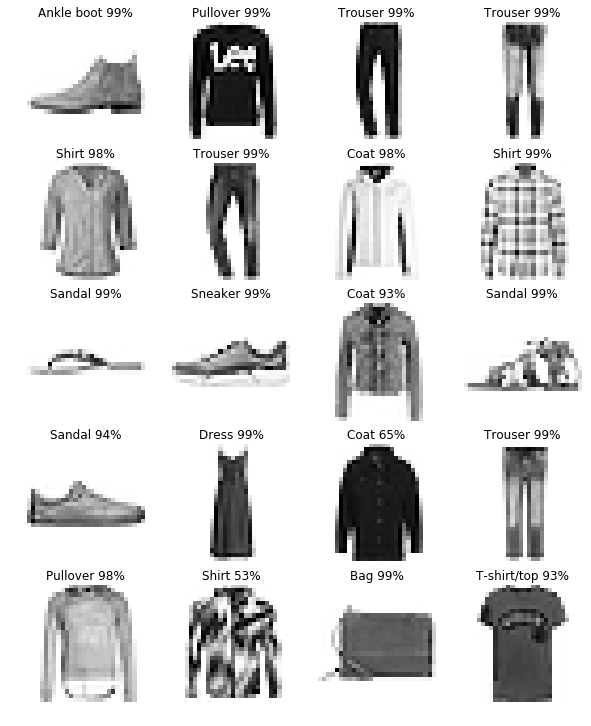

In [39]:
# look at actual model predictions

n = 20  # look at this many predictions
X_new = X_test[:n]
probs=model.predict(X_new)

# Plot
cols = 4
rows = (len(X_new)+cols-1)//cols 
plt.figure(figsize=(cols*2.5,rows*2.5))

for i,x in enumerate(X_new):
    ax = plt.subplot(rows,cols,i+1)
    ax.imshow(x, cmap='Greys')
    best_guess = np.argmax(probs[i])
    best_prob = int(probs[i][best_guess] * 100)
    ax.set_title(class_names[best_guess]+' {}%'.format(best_prob))
    ax.axis('off')

In [20]:
w,b = model.get_layer('dense_1').get_weights()